# Cluster by features

In [1]:
import sys
sys.path.append("../")
import src.cluster as cl

In [2]:
from sklearn.cluster import KMeans, DBSCAN

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
import numpy as np

## Cluster the songs you like

In [5]:
df = pd.read_csv("../data/songs_you_like.csv", index_col = 0 )

In [6]:
df.columns

Index(['Id', 'Name', 'Artist', 'Album', 'Release_date', 'Popularity',
       'Song_decade', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration_ms', 'Valence',
       'Artist_followers'],
      dtype='object')

## Outliers

In [7]:
features = ['Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Valence']

In [8]:
df_num = df[features]

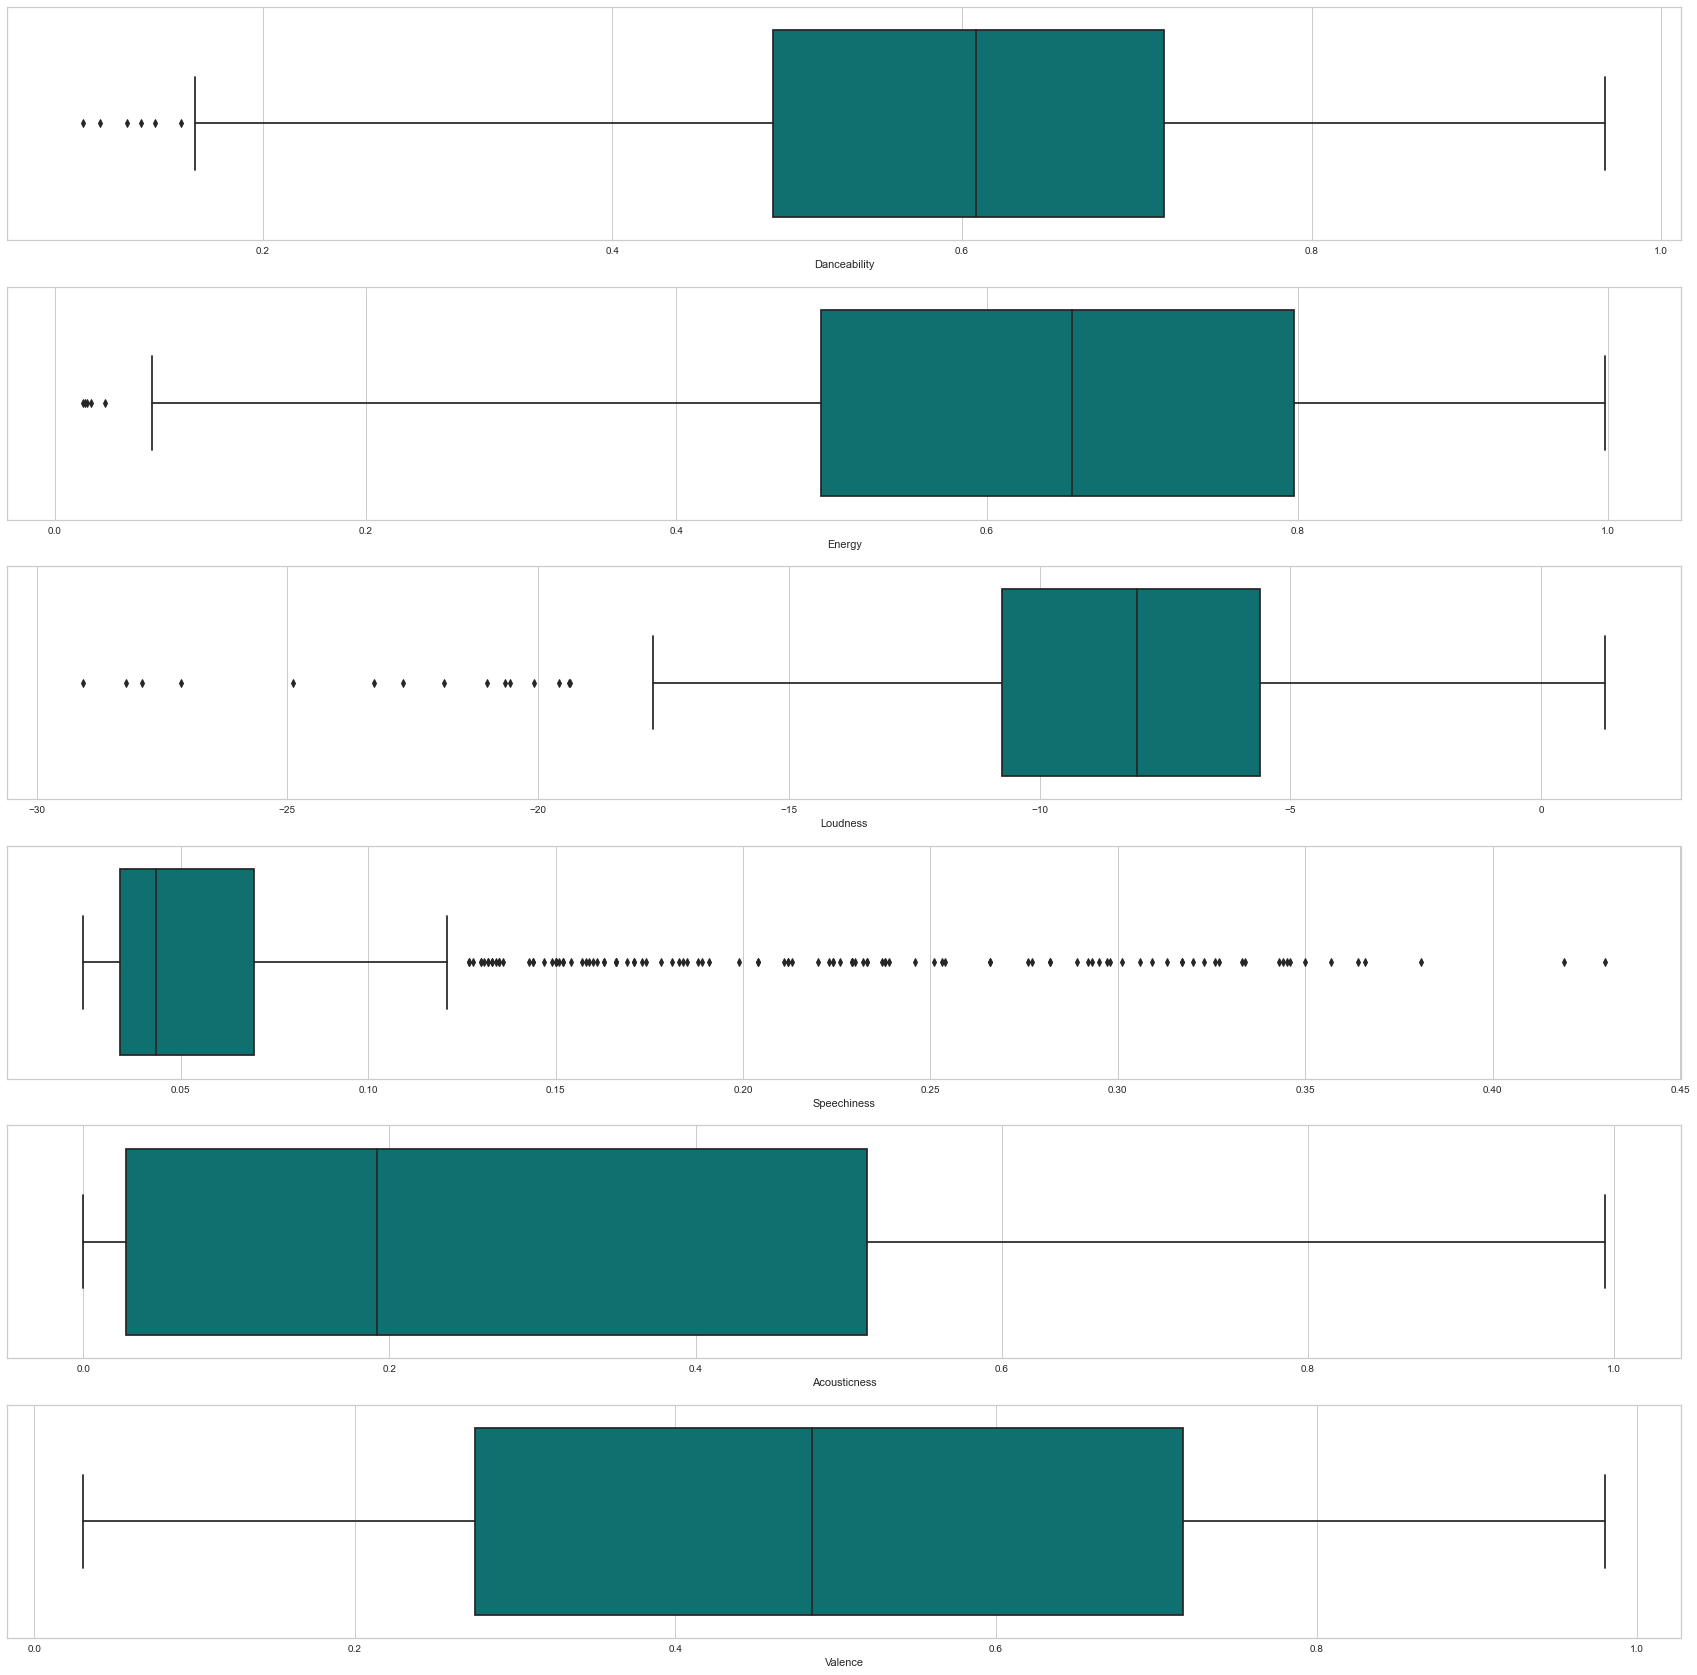

In [9]:
cl.boxplots_df(df_num)

In [10]:
df['Speechiness'] = np.log(df['Speechiness'])

the logarithmic transformation can be used to reduce the influence of the outliers and make the data more symmetric. This can help to improve the clustering performance by ensuring that each variable is contributing equally to the clustering process.


## StandarScaler

In [11]:
df[features].describe().T

,count,mean,std,min,25%,50%,75%,max
Danceability,1014.0,0.596141,0.161430,0.097200,0.492000,0.608000,0.715750,0.96800
Energy,1014.0,0.633840,0.203947,0.018200,0.493000,0.655000,0.798000,0.99800
Loudness,1014.0,-8.491825,3.748314,-29.069000,-10.754000,-8.061000,-5.614250,1.27500
Speechiness,1014.0,-2.937406,0.623791,-3.729701,-3.387294,-3.136145,-2.664991,-0.84397
Acousticness,1014.0,0.288635,0.283789,0.000007,0.028025,0.192000,0.512000,0.99400
Valence,1014.0,0.493313,0.267694,0.030600,0.275000,0.485000,0.716750,0.98000


In [12]:
df_num = df[features]

It is good practice to scale the data before applying K-means clustering to ensure that all variables are measured on the same scale and are given equal weight in the analysis.

In [13]:
scaled=cl.standarscaler(df_num, features)

In [14]:
scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Danceability,1014.0,4.171548e-17,1.000493,-3.092293,-0.645437,0.073497,0.741301,2.304673
Energy,1014.0,-8.934339e-17,1.000493,-3.020108,-0.690909,0.103806,0.805313,1.786441
Loudness,1014.0,-3.778481e-16,1.000493,-5.492424,-0.603816,0.114995,0.768077,2.606944
Speechiness,1014.0,-2.822638e-16,1.000493,-1.270755,-0.721572,-0.318755,0.436925,3.357645
Acousticness,1014.0,8.408790e-17,1.000493,-1.017554,-0.918776,-0.340685,0.787470,2.486754
Valence,1014.0,1.234083e-16,1.000493,-1.729364,-0.815933,-0.031069,0.835084,1.818966


In [15]:
df[df_num.columns] = scaled

In [16]:
df[features].isnull().sum()

Danceability    0
Energy          0
Loudness        0
Speechiness     0
Acousticness    0
Valence         0
dtype: int64

## Kmean Method

### Metrics: Inertia, Silhouette & DBI

**Inertia**  measures the sum of squared distances between each point and its assigned centroid, which reflects how spread out the clusters are. The goal is to minimize the inertia value, while still maintaining a reasonable number of clusters. A lower inertia indicates that clusters are more compact and better separated.

**Silhouette** It measures how similar a point is to its own cluster compared to other clusters. (From -1 to 1) A high silhoutte indicates a better distribution of clusters. **We have to find a combination between a high Silhouette with a low inertia!** 

**Davies-Bouldin Index (DBI)** measures the average similarity between each cluster and its most similar cluster, as well as the average distance between each cluster and its centroid.The Davies-Bouldin index value is lower when the clusters are more compact and are more separated from each other.

In [17]:
df_metrics=cl.metric_cluster(scaled)
df_metrics.set_index("Number_Cluster")

,Inertia,Silhouette,DBI
Number_Cluster,,,
2,4333.833369,0.272291,1.445204
3,3686.885942,0.210108,1.611713
4,3206.325108,0.216942,1.436207
5,2896.740494,0.205914,1.396728
6,2664.776583,0.192796,1.417714
7,2475.930749,0.197330,1.425650
8,2308.229089,0.194148,1.369146
9,2188.034938,0.197711,1.362579
10,2083.527666,0.181203,1.393448


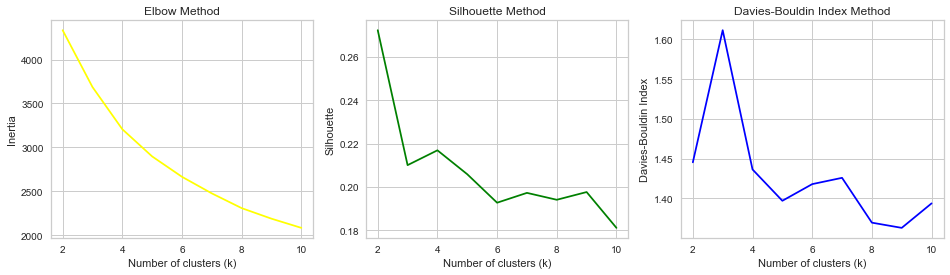

In [18]:
cl.inertia_silhouette_db(scaled)

### Kmeans with n_clusters=2

In [19]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled)
y_kmeans = kmeans.predict(scaled)

In [20]:
df['Cluster_features'] = kmeans.labels_

In [21]:
df['Cluster_features'].value_counts()

1    640
0    374
Name: Cluster_features, dtype: int64

In [22]:
cluster_stats=cl.get_cluster_stats_median(df, features)

In [23]:
cluster_stats #median better measure because of outliers!!

,Danceability,Energy,Loudness,Speechiness,Acousticness,Valence
0,0.0673,0.591917,0.627345,-0.192794,-0.787717,0.426768
1,0.073497,-0.926379,-0.755425,-0.479763,0.991948,-0.810326


In [24]:
cluster_stats.to_csv("../data/cluster_stats.csv")

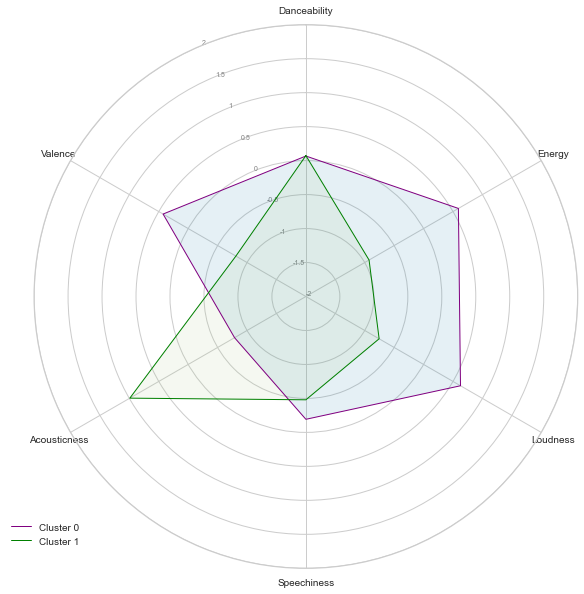

In [25]:
radar_plot=cl.radar_plot(cluster_stats)
radar_plot.show() 

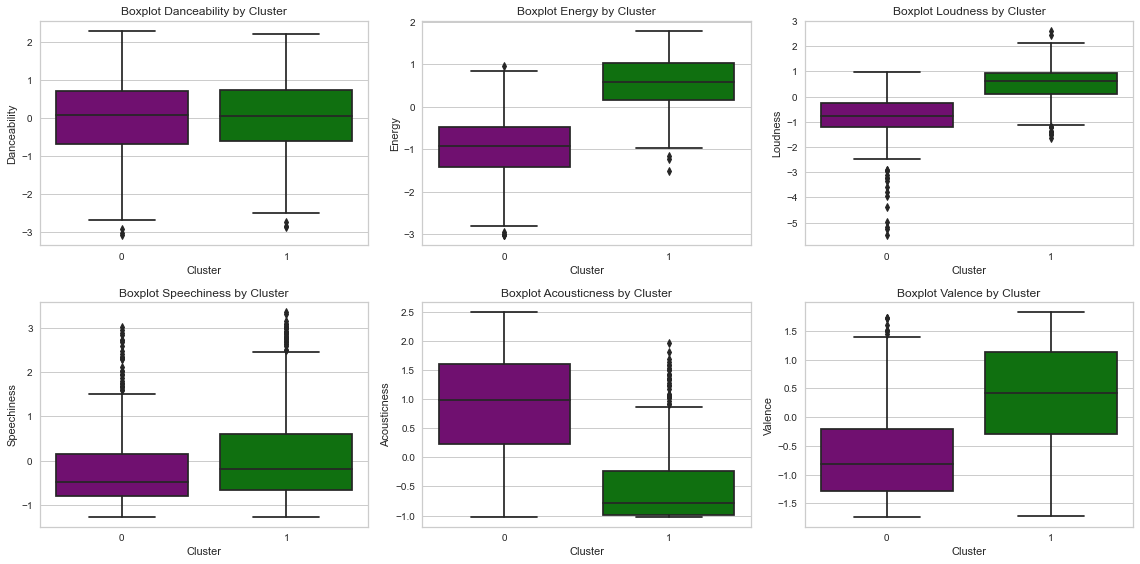

In [26]:
cl.boxplot_features_cluster(df,"Cluster_features", features) #cluster 0 summer/ cluster 1 winter

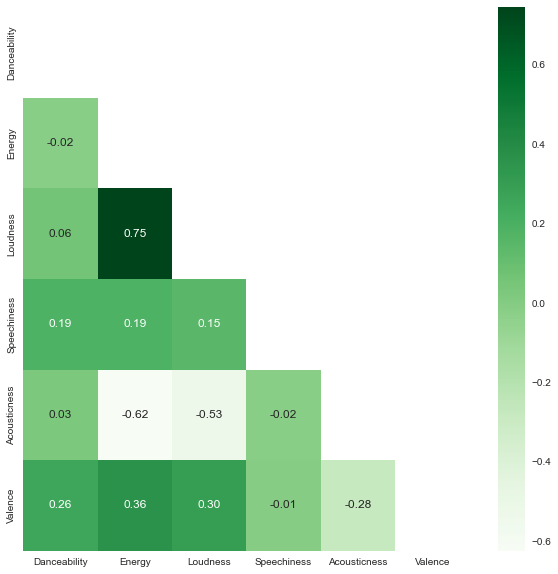

In [27]:
cl.heatmap_correlation_features(df,features)

In [28]:
df.to_csv("../data/songs_you_like_clusterfeatures.csv")